In [1]:
import pandas as pd

# 행 추가

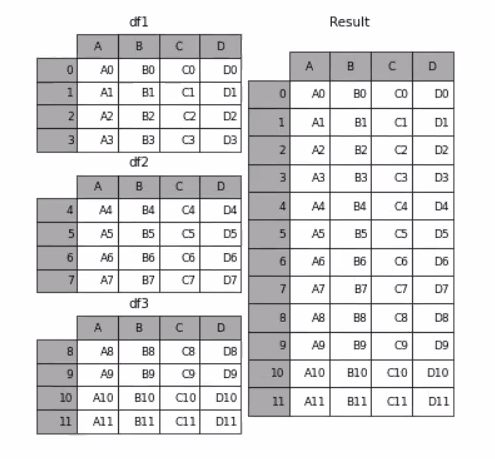

## pandas.concat()

* Excel data
* http://youngho.iwinv.net/data/data_handling.xlsx

In [3]:
data_file = 'http://youngho.iwinv.net/data/data_handling.xlsx'
data_excel = pd.ExcelFile(data_file)
data_excel.sheet_names

['a', 'b', 'c', 'd']

In [4]:
data_a = data_excel.parse('a')
data_a

,a1,a2,a3
0,1,a,1200
1,2,b,4500
2,3,c,10000
3,4,d,9600
4,5,e,150


In [5]:
data_b = data_excel.parse('b')
data_b

,b1,b2,b3
0,6,f,4600
1,7,g,9850


In [6]:
frames = [data_a, data_b]
pd.concat(frames)

,a1,a2,a3,b1,b2,b3
0,1.0,a,1200.0,NaN,NaN,NaN
1,2.0,b,4500.0,NaN,NaN,NaN
2,3.0,c,10000.0,NaN,NaN,NaN
3,4.0,d,9600.0,NaN,NaN,NaN
4,5.0,e,150.0,NaN,NaN,NaN
0,NaN,NaN,NaN,6.0,f,4600.0
1,NaN,NaN,NaN,7.0,g,9850.0


In [8]:
### 새로운 열 이름을 생성하여 합치기
new_col_names = ['no', 'name', 'balance']
data_a.columns = new_col_names
data_b.columns = new_col_names
pd.concat([data_a, data_b])

,no,name,balance
0,1,a,1200
1,2,b,4500
2,3,c,10000
3,4,d,9600
4,5,e,150
0,6,f,4600
1,7,g,9850


In [11]:
### 기존 행 인덱스 무시
pd.concat([data_a, data_b], ignore_index=True)

,no,name,balance
0,1,a,1200
1,2,b,4500
2,3,c,10000
3,4,d,9600
4,5,e,150
5,6,f,4600
6,7,g,9850


## DataFrame.append() - SKIP!!!

## ▣ 연습문제 - 진도태양광
* http://youngho.iwinv.net/data/power_station.xlsx

In [31]:
data_file = 'http://youngho.iwinv.net/data/power_station.xlsx'
data_excel = pd.ExcelFile(data_file)
data_excel.sheet_names

['2014년', '2015년', '2016년', '2017년', '2018년']

In [35]:
### sheet names 사용 - 반복문
data_power = data_excel.parse(data_excel.sheet_names[0])
for i in data_excel.sheet_names[1:]:
    data_power = pd.concat([data_power, data_excel.parse(i)], ignore_index=True)

data_power

,날짜,발전기명,발전기코드,발전/펌핑구분,01시,02시,03시,04시,05시,06시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2014-01-01,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,607824,292680,68976,0,0,0,0,0,0,0
1,2014-01-02,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,726048,363024,64584,0,0,0,0,0,0,0
2,2014-01-03,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,374184,212256,73080,0,0,0,0,0,0,0
3,2014-01-04,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,786240,405648,74520,0,0,0,0,0,0,0
4,2014-01-05,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,705024,369360,78984,8064,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2018-12-27,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,245808,110952,27576,0,0,0,0,0,0,0
1823,2018-12-28,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,243000,165240,55440,0,0,0,0,0,0,0
1824,2018-12-29,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,707112,342216,56232,7776,0,0,0,0,0,0
1825,2018-12-30,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,650016,220752,86904,0,0,0,0,0,0,0


# 열 추가

## pandas.concat()

In [36]:
data_file = 'http://youngho.iwinv.net/data/data_handling.xlsx'
data_excel = pd.ExcelFile(data_file)
data_excel.sheet_names #see all sheet names

['a', 'b', 'c', 'd']

In [37]:
data_a = data_excel.parse('a')
data_c = data_excel.parse('c')
### row index 기준 병합 - axis=1
frames = [data_a, data_c]
pd.concat(frames, axis=1)

,a1,a2,a3,c1,c2
0,1,a,1200,1,20
1,2,b,4500,2,40
2,3,c,10000,3,60
3,4,d,9600,4,30
4,5,e,150,5,20


In [40]:
data_c.index = range(2,7)
data_c

,c1,c2
2,1,20
3,2,40
4,3,60
5,4,30
6,5,20


In [41]:
frames = [data_a, data_c]
pd.concat(frames, axis=1)

,a1,a2,a3,c1,c2
0,1.0,a,1200.0,NaN,NaN
1,2.0,b,4500.0,NaN,NaN
2,3.0,c,10000.0,1.0,20.0
3,4.0,d,9600.0,2.0,40.0
4,5.0,e,150.0,3.0,60.0
5,NaN,NaN,NaN,4.0,30.0
6,NaN,NaN,NaN,5.0,20.0


In [43]:
pd.concat(frames, axis=1, join='inner')

,a1,a2,a3,c1,c2
2,3,c,10000,1,20
3,4,d,9600,2,40
4,5,e,150,3,60


## pandas.merge()

JOIN의 종류
* inner join (natural join 교집합)
* outer join (합집합)
* left join (1번째 데이터 기준)
* right join (2번째 데이터 기준)

In [44]:
data_file = 'http://youngho.iwinv.net/data/data_handling.xlsx'
data_excel = pd.ExcelFile(data_file)
data_excel.sheet_names #see all sheet names

['a', 'b', 'c', 'd']

In [46]:
data_a = data_excel.parse('a')
data_d = data_excel.parse('d')
data_a

,a1,a2,a3
0,1,a,1200
1,2,b,4500
2,3,c,10000
3,4,d,9600
4,5,e,150


In [47]:
data_d

,d1,d2
0,3,-500
1,4,-1000
2,5,0
3,6,-700
4,7,-600


### inner join

In [54]:
pd.merge(data_a, data_d, left_on='a1', right_on='d1')

,a1,a2,a3,d1,d2
0,3,c,10000,3,-500
1,4,d,9600,4,-1000
2,5,e,150,5,0


### outer join

In [55]:
pd.merge(data_a, data_d, left_on='a1', right_on='d1', how='outer')

,a1,a2,a3,d1,d2
0,1.0,a,1200.0,NaN,NaN
1,2.0,b,4500.0,NaN,NaN
2,3.0,c,10000.0,3.0,-500.0
3,4.0,d,9600.0,4.0,-1000.0
4,5.0,e,150.0,5.0,0.0
5,NaN,NaN,NaN,6.0,-700.0
6,NaN,NaN,NaN,7.0,-600.0


### left join

In [53]:
pd.merge(data_a, data_d, left_on='a1', right_on='d1', how='left')

,a1,a2,a3,d1,d2
0,1,a,1200,NaN,NaN
1,2,b,4500,NaN,NaN
2,3,c,10000,3.0,-500.0
3,4,d,9600,4.0,-1000.0
4,5,e,150,5.0,0.0
